# Import Libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

# Load Data and Prelimary Look

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

dari info diatas dapat kita ketahui berbagai tipe data tiap kolomnya, serta data ini terdiri dari 4250 baris dan 20 kolom

In [ ]:
# Group column names based on type
cats = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums = ['account_length', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls','total_intl_charge','number_customer_service_calls']

In [ ]:
# Descriptive statistic based on type
train[nums].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
train[cats].describe()

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


# Data Cleaning

## Check Missing Value

In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Check Data Duplicated

In [ ]:
train.duplicated().sum()

0

kualitas data sudah baik, tidak terdapat missing value dan duplikat value

# Exploratory Data Analysis


In [ ]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

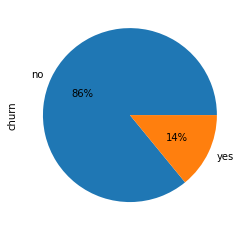

In [ ]:
train['churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

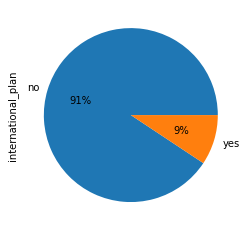

In [ ]:
train['international_plan'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
train['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

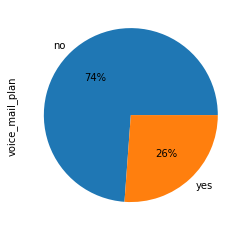

In [ ]:
train['voice_mail_plan'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

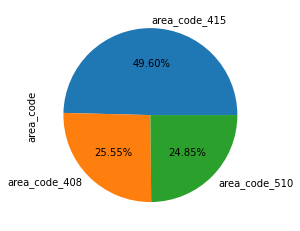

In [ ]:
train['area_code'].value_counts().plot(kind='pie', autopct='%.2f%%')

Text(0.5, 0, 'Customer yg miliki plan international')

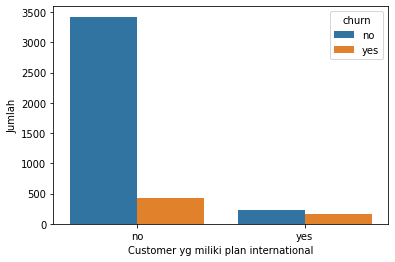

In [ ]:
hitung = train.groupby(['international_plan', 'churn']).count().reset_index()

sns.barplot(data= hitung, x='international_plan', y='account_length', hue='churn')
plt.ylabel('Jumlah')
plt.xlabel('Customer yg miliki plan international')

Text(0.5, 0, 'Customer yg miliki plan voice mail')

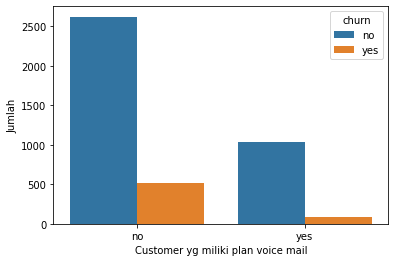

In [ ]:
hitung2 = train.groupby(['voice_mail_plan', 'churn']).count().reset_index()

sns.barplot(data= hitung2, x='voice_mail_plan', y='account_length', hue='churn')
plt.ylabel('Jumlah')
plt.xlabel('Customer yg miliki plan voice mail')

Text(0.5, 0, 'Customer churn berdasarkan area')

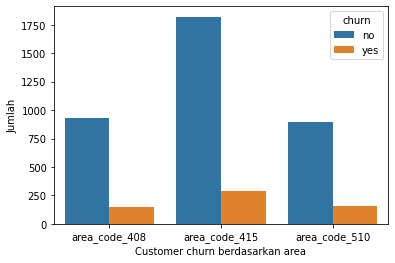

In [ ]:
hitung3 = train.groupby(['area_code', 'churn'])['account_length'].count().reset_index()

sns.barplot(data= hitung3, x='area_code', y='account_length', hue='churn')
plt.ylabel('Jumlah')
plt.xlabel('Customer churn berdasarkan area')

Berdasarkan basic visual data yang disediakan menginformasikan bahwa customer churn lebih sedikit dibanding yang loyal

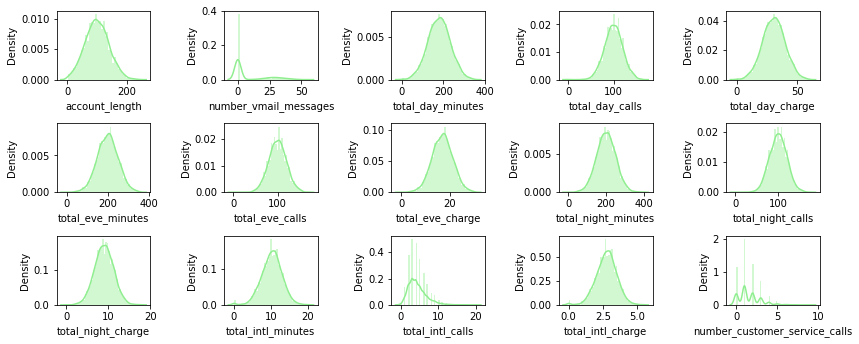

In [ ]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
  plt.subplot(4, len(features)//3, i+1)
  sns.distplot(x=train[features[i]], color ='lightgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

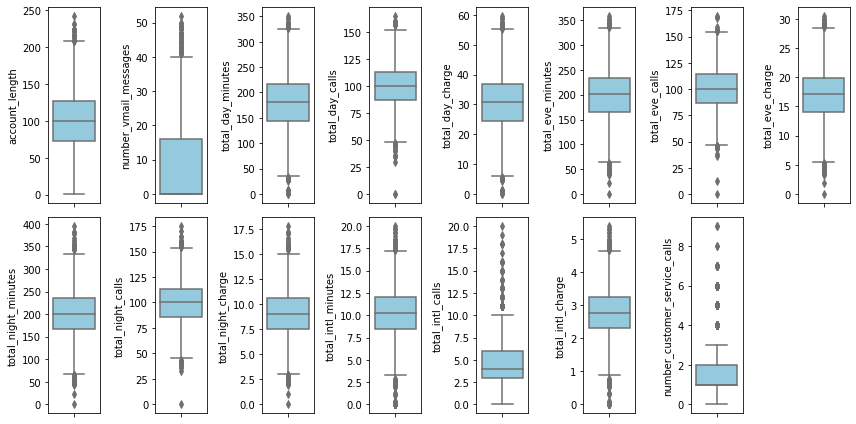

In [ ]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
  plt.subplot(2, len(features)//2+1, i+1)
  sns.boxplot(y=train[features[i]], color='skyblue')
  plt.tight_layout()

data terdistribusi normal dengan baik akan tetapi terdapat outliers di tiap kolom

# Preprocessing

## Standardization and Normalization

In [ ]:
train[nums].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
for col in nums:
  scaler = MinMaxScaler()
  train[col] = scaler.fit_transform(train[col].values.reshape(len(train), 1))

In [ ]:
train[nums].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.410067,0.146765,0.512830,0.605499,0.512796,0.557122,0.589273,0.557139,0.507666,0.570512,0.507816,0.512804,0.221318,0.512899,0.173229
std,0.164043,0.258459,0.153663,0.120308,0.153650,0.139854,0.117109,0.139856,0.127477,0.114818,0.127514,0.138005,0.123153,0.138001,0.145715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297521,0.000000,0.407752,0.527273,0.407714,0.461801,0.511765,0.461771,0.423354,0.491429,0.423326,0.425000,0.150000,0.425926,0.111111
50%,0.409091,0.000000,0.513371,0.606061,0.513387,0.558586,0.588235,0.558612,0.507468,0.571429,0.507597,0.515000,0.200000,0.514815,0.111111
75%,0.520661,0.307692,0.615078,0.684848,0.614960,0.650640,0.670588,0.650540,0.594177,0.645714,0.594260,0.600000,0.300000,0.600000,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outliers

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(train[nums])}')

filtered_entries = np.array([True] * len(train[nums]))
for col in nums :
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries
    
train_outlier = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train_outlier)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3513


terdapat outliers akan tetapi karena outlier cukup besar berada di kisaran 18%an dari total ada maka outliers tersebut dibiarkan

## Features Encoding

In [ ]:
train = train.join(pd.get_dummies(train[['area_code',
                  'international_plan', 'voice_mail_plan', 'churn']])
                  .drop(['international_plan_no', 'voice_mail_plan_no', 'churn_no'], axis=1))
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,OH,0.438017,area_code_415,no,yes,0.500000,0.459744,0.745455,0.459672,0.544114,...,0.15,0.685185,0.111111,no,0,1,0,0,1,0
1,NJ,0.561983,area_code_415,no,no,0.000000,0.692461,0.690909,0.692436,0.337323,...,0.25,0.609259,0.000000,no,0,1,0,0,0,0
2,OH,0.342975,area_code_408,yes,no,0.000000,0.851778,0.430303,0.851740,0.172279,...,0.35,0.329630,0.222222,no,1,0,0,1,0,0
3,OK,0.305785,area_code_415,yes,no,0.000000,0.474253,0.684848,0.474230,0.412747,...,0.15,0.505556,0.333333,no,0,1,0,1,0,0
4,MA,0.495868,area_code_510,no,yes,0.461538,0.620768,0.533333,0.620649,0.969942,...,0.35,0.375926,0.333333,no,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,0.338843,area_code_415,no,no,0.000000,0.535704,0.424242,0.535643,0.678542,...,0.30,0.514815,0.000000,no,0,1,0,0,0,0
4246,WV,0.297521,area_code_408,no,no,0.000000,0.506117,0.539394,0.506024,0.365154,...,0.30,0.575926,0.333333,no,1,0,0,0,0,0
4247,NC,0.305785,area_code_408,no,no,0.000000,0.485633,0.612121,0.485609,0.537434,...,0.35,0.344444,0.111111,no,1,0,0,0,0,0
4248,HI,0.202479,area_code_408,no,yes,0.769231,0.670555,0.769697,0.670515,0.620651,...,0.25,0.494444,0.222222,no,1,0,0,0,1,0


In [ ]:
train.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], axis = 1, inplace = True)
train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0.438017,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,...,0.685,0.15,0.685185,0.111111,0,1,0,0,1,0
1,0.561983,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,...,0.610,0.25,0.609259,0.000000,0,1,0,0,0,0
2,0.342975,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,...,0.330,0.35,0.329630,0.222222,1,0,0,1,0,0
3,0.305785,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,...,0.505,0.15,0.505556,0.333333,0,1,0,1,0,0
4,0.495868,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,...,0.375,0.35,0.375926,0.333333,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.338843,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,...,0.515,0.30,0.514815,0.000000,0,1,0,0,0,0
4246,0.297521,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,...,0.575,0.30,0.575926,0.333333,1,0,0,0,0,0
4247,0.305785,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,...,0.345,0.35,0.344444,0.111111,1,0,0,0,0,0
4248,0.202479,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,...,0.495,0.25,0.494444,0.222222,1,0,0,0,1,0


In [ ]:
train.rename(columns = {'area_code_area_code_408':'area_408', 'area_code_area_code_415':'area_415', 'area_code_area_code_510':'area_510', 'international_plan_yes':'international_plan', 'voice_mail_plan_yes':'voice_mail_plan', 'churn_yes':'churn'}, inplace = True)
train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_408,area_415,area_510,international_plan,voice_mail_plan,churn
0,0.438017,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,...,0.685,0.15,0.685185,0.111111,0,1,0,0,1,0
1,0.561983,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,...,0.610,0.25,0.609259,0.000000,0,1,0,0,0,0
2,0.342975,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,...,0.330,0.35,0.329630,0.222222,1,0,0,1,0,0
3,0.305785,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,...,0.505,0.15,0.505556,0.333333,0,1,0,1,0,0
4,0.495868,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,...,0.375,0.35,0.375926,0.333333,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.338843,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,...,0.515,0.30,0.514815,0.000000,0,1,0,0,0,0
4246,0.297521,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,...,0.575,0.30,0.575926,0.333333,1,0,0,0,0,0
4247,0.305785,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,...,0.345,0.35,0.344444,0.111111,1,0,0,0,0,0
4248,0.202479,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,...,0.495,0.25,0.494444,0.222222,1,0,0,0,1,0


## Imbalance Data Handling

In [ ]:
target = train['churn'].value_counts().reset_index()
target.rename(columns={'index':'churn','churn':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,churn,freq,percentage
0,0,3652,85.93
1,1,598,14.07


In [ ]:
smote = over_sampling.SMOTE(random_state=42)

X = train.drop(columns = 'churn')
Y = train['churn']
X_smote, y_smote = smote.fit_resample(X,Y)

print(f''' shape of X before SMOTE:{X.shape}
      shape of X after SMOTE:{X_smote.shape}''')

print('\nbalance of positive & negative classes (%):')
y_smote.value_counts(normalize=True)*100

 shape of X before SMOTE:(4250, 20)
      shape of X after SMOTE:(7304, 20)

balance of positive & negative classes (%):


0    50.0
1    50.0
Name: churn, dtype: float64

In [ ]:
y_smote.value_counts()

0    3652
1    3652
Name: churn, dtype: int64

# Modelling

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_smote, y_smote,
                                                test_size = 0.2,
                                                random_state = 42)

## Logistic Regression(as baseline)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## XGBoost

In [ ]:
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

## Evaluation

In [ ]:
models = [logreg, rfc, xgb]
str_model = ['logreg', 'rfc', 'xgb']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  print(f'performa {str_mod}:')
  print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  print()

performa logreg:
[[602 156]
 [134 569]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       758
           1       0.78      0.81      0.80       703

    accuracy                           0.80      1461
   macro avg       0.80      0.80      0.80      1461
weighted avg       0.80      0.80      0.80      1461


performa rfc:
[[740  18]
 [ 43 660]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       758
           1       0.97      0.94      0.96       703

    accuracy                           0.96      1461
   macro avg       0.96      0.96      0.96      1461
weighted avg       0.96      0.96      0.96      1461


performa xgb:
[[735  23]
 [ 53 650]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       758
           1       0.97      0.92      0.94       703

    accuracy                           0.95      1461
   macro avg

## Validation

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,
                              random_state=42)

In [ ]:
for model,str_mod in zip(models, str_model):
  result = model_selection.cross_val_score(model, X, Y, cv=kfold,
                                           scoring='accuracy')
  print(f'Model {str_mod}:')
  print('Accuracy:%.2f%% (%.2f%%)' % (result.mean()*100, result.std()*100))

Model logreg:
Accuracy:86.71% (1.48%)
Model rfc:
Accuracy:95.88% (0.80%)
Model xgb:
Accuracy:95.67% (1.04%)


Random forest classifier merupakan model terbaik dengan meraih f1-score di 96% dan memiliki nilai validitas paling besar dibanding model lain.

## Tuning

In [ ]:
# Grid search CV
params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [ ]:
gridcv = GridSearchCV(rfc, params, cv = 10, scoring='accuracy')

In [ ]:
gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
print(gridcv.best_params_)
print(gridcv.best_score_*100)

{'max_depth': 14, 'max_features': 9}
95.01952347500293


nilai diatas merupakan parameter dan nilai terbaik yang dapat diperoleh dan menjaga model tersebut melakukan overfitting

# Testing


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
test = test.join(pd.get_dummies(test[['area_code',
                  'international_plan', 'voice_mail_plan']])
                  .drop(['international_plan_no', 'voice_mail_plan_no'], axis=1))

In [ ]:
test.drop(['id', 'state', 'area_code', 'international_plan', 'voice_mail_plan'], axis = 1, inplace = True)
test

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1,0,0,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0,1,0,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0,1,0,0,0
746,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,1,0,0,0,0
747,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0,1,0,0,0
748,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0,1,0,0,0


In [ ]:
test.rename(columns = {'area_code_area_code_408':'area_408', 'area_code_area_code_415':'area_415', 'area_code_area_code_510':'area_510', 'international_plan_yes':'international_plan', 'voice_mail_plan_yes':'voice_mail_plan', 'churn_yes':'churn'}, inplace = True)
test

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_408,area_415,area_510,international_plan,voice_mail_plan
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1,0,0,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0,1,0,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0,1,0,0,0
746,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,1,0,0,0,0
747,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0,1,0,0,0
748,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0,1,0,0,0


In [ ]:
for num in test:
  scaler = MinMaxScaler()
  test[num] = scaler.fit_transform(test[num].values.reshape(len(test), 1))


In [ ]:
test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_408,area_415,area_510,international_plan,voice_mail_plan
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.419347,0.165778,0.496467,0.497753,0.496399,0.517468,0.498215,0.517590,0.474536,0.566479,0.474669,0.544663,0.236070,0.545085,0.272444,0.230667,0.516000,0.253333,0.102667,0.281333
std,0.167506,0.276936,0.157429,0.159020,0.157429,0.156949,0.152500,0.156958,0.164427,0.122982,0.164462,0.146579,0.127468,0.146609,0.212701,0.421541,0.500077,0.435210,0.303726,0.449950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308017,0.000000,0.396468,0.395161,0.396366,0.407820,0.393701,0.407909,0.362396,0.487179,0.362589,0.451058,0.157895,0.451961,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.421941,0.000000,0.489802,0.500000,0.489741,0.517744,0.503937,0.517870,0.473995,0.567308,0.474113,0.544974,0.210526,0.545098,0.166667,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.527426,0.411765,0.601463,0.604839,0.601374,0.615865,0.598425,0.615977,0.586790,0.647436,0.586879,0.640212,0.315789,0.641176,0.333333,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
predictions_test = rfc.predict(test)

In [ ]:
data = pd.DataFrame({'churn' : predictions_test})

In [ ]:
test.reset_index(level = 0, inplace=True)
data.reset_index(level = 0,inplace=True)
test_final = test.merge(data, on='index')

In [ ]:
test_final.drop('index', axis=1, inplace=True)
test_final

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_408,area_415,area_510,international_plan,voice_mail_plan,churn
0,0.535865,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,...,0.529101,0.157895,0.529412,0.166667,0.0,1.0,0.0,0.0,1.0,0
1,0.493671,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,...,0.333333,0.315789,0.333333,0.000000,0.0,0.0,1.0,1.0,0.0,0
2,0.257384,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,...,0.693122,0.315789,0.694118,0.666667,0.0,1.0,0.0,0.0,0.0,1
3,0.388186,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,...,0.428571,0.157895,0.429412,0.500000,0.0,0.0,1.0,0.0,0.0,1
4,0.729958,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,...,0.820106,0.263158,0.821569,0.500000,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,...,0.597884,0.368421,0.598039,0.000000,0.0,1.0,0.0,0.0,0.0,0
746,0.303797,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,...,0.650794,0.105263,0.650980,0.500000,1.0,0.0,0.0,0.0,0.0,0
747,0.637131,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,...,0.777778,0.105263,0.778431,0.500000,0.0,1.0,0.0,0.0,0.0,0
748,0.253165,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,...,0.719577,0.210526,0.719608,0.166667,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
result = test_final['churn'].value_counts().reset_index()
result.rename(columns={'index':'churn','churn':'freq'}, inplace=True)
result['percentage'] = round((result['freq']/result['freq'].sum())*100,2)
result

,churn,freq,percentage
0,0,586,78.13
1,1,164,21.87


dengan data test yang baru di perkiraan akan terjadi customer churn sebesar 21,87%